In [1]:
import os
import platform

import pandas as pd
import numpy as np

pd.set_option('max.columns', 1000)

import warnings
warnings.filterwarnings(action = 'ignore')

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

# 서로 다른 운영체제를 사용하기 때문에 각 운영체제에 맞는 글씨체 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:
    plt.rcParams['font.family'] = 'AppleGothic'
    
from scipy import stats

from imblearn.over_sampling import SMOTE
from pycaret.classification import *

## 데이터 불러오기

In [2]:
# 현재 경로를 저장
current_path = os.getcwd()

# 사용할 데이터가 저장되어 있는 경로를 저장
data_path = input('사용할 데이터가 저장되어 있는 경로를 입력해주세요 :')

사용할 데이터가 저장되어 있는 경로를 입력해주세요 : C:/Users/KCG/Desktop/DACON_JOISS/Data


In [52]:
# 데이터 불러오기
raw_coast_data = pd.read_csv(data_path + '/격자(4단계)_데이터최종결합_median.csv', encoding = 'CP949')

# '평균' 변수 제거
raw_coast_data = raw_coast_data.drop('평균', axis = 1)

# 데이터 일부 확인
print('Shape of Coast data :', raw_coast_data.shape, '\n')
print(raw_coast_data.info(), '\n')
display(raw_coast_data.head())

Shape of Coast data : (1399, 31) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1399 non-null   int64  
 1   수온      1399 non-null   float64
 2   염분      1399 non-null   float64
 3   용존무기질   1399 non-null   float64
 4   암모니아성   1399 non-null   float64
 5   아질산성질   1399 non-null   float64
 6   수소이온농   1399 non-null   float64
 7   부유물질    1399 non-null   float64
 8   규산염     1399 non-null   float64
 9   화학적산소   1399 non-null   float64
 10  투명도     1399 non-null   float64
 11  질소      1399 non-null   float64
 12  질산성질소   1399 non-null   float64
 13  인산염인    1399 non-null   float64
 14  클로로필    1399 non-null   float64
 15  용존산소    1399 non-null   float64
 16  총인      1399 non-null   float64
 17  자갈      1399 non-null   float64
 18  모래      1399 non-null   float64
 19  실트      1399 non-null   float64
 20  점토      1399 non-null   float64
 21  분급

,id,수온,염분,용존무기질,암모니아성,아질산성질,수소이온농,부유물질,규산염,화학적산소,투명도,질소,질산성질소,인산염인,클로로필,용존산소,총인,자갈,모래,실트,점토,분급,IL,AVS,TOC,출현 종수,서식밀도,생체량,다양도,ISEP,target
0,316,26.545904,32.266284,66.109781,14.322414,6.973147,8.971842,11.729158,304.898470,1.932255,2.790482,272.399140,44.816863,9.331492,4.020105,8.383000,27.493661,2.131936,21.012963,53.767258,23.087646,2.241080,3.900139,0.012845,0.575763,13,1073,150.545300,1.715788,4.175382,0
1,317,26.555080,32.312201,64.474075,14.593281,6.735420,9.020974,11.715535,305.709195,1.920633,2.876308,269.995185,43.151896,9.239086,4.006589,8.381494,27.350137,2.388136,22.438908,52.496485,22.697930,2.224635,3.867279,0.012892,0.568869,13,1100,146.906715,1.707911,4.207599,0
2,401,24.010903,31.337345,27.902231,12.518333,2.279968,8.153232,7.047915,158.576875,1.820178,2.495793,200.074455,13.180409,7.248091,5.254767,8.494714,21.724608,0.564265,55.127657,35.540126,8.770322,1.634023,2.947883,0.006344,0.383511,13,1047,314.910615,1.745795,4.040487,0
3,402,24.195079,31.393658,42.311762,19.336271,3.228646,8.144855,7.970248,201.319945,1.867706,2.524248,217.344345,19.809824,9.458643,5.185926,8.302811,25.360672,0.541554,53.524824,36.376906,9.480037,1.744004,3.112902,0.007427,0.408045,13,1051,338.006930,1.776740,3.981114,0
4,403,24.317078,31.425321,58.525447,27.159785,4.254249,8.137352,9.072605,253.782260,1.937710,2.545189,237.580635,27.159875,12.054842,5.129125,8.086393,29.792724,0.550979,53.523564,35.998440,9.931874,1.816959,3.226403,0.008408,0.424802,14,1072,365.213195,1.810976,3.902928,0


## Target 변수 확인

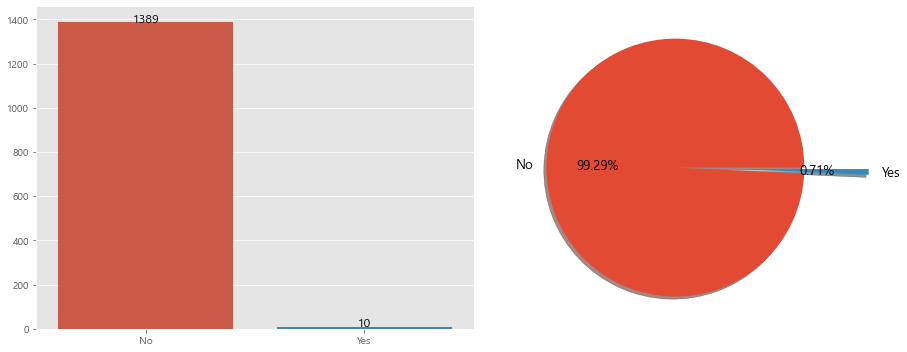

In [53]:
# Target 데이터 확인
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))

# Countplot
sns.countplot(x = 'target', data = raw_coast_data, ax = axes[0])
axes[0].set_xticklabels(labels = ['No', 'Yes'])

for rect in axes[0].patches:
    axes[0].text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), ha = 'center', fontsize = 12)

# Pie Chart
plot_data = raw_coast_data['target'].value_counts()
plot_data.plot.pie(explode = [0, 0.5], shadow = True, labels = ['No', 'Yes'], fontsize = 13, autopct = '%.2f%%', ax = axes[1])
    
for index in [0, 1]:
    axes[index].set_xlabel('')
    axes[index].set_ylabel('')

fig.tight_layout()

- 1,399개의 격자에서 갯끈풀이 발생한 격자는 **10**개로, 전체 데이터 중에서 **0.71**%를 차지한다.


- 위의 결과를 통해, 현재 데이터에 불균형이 존재함을 확인할 수 있으므로 오버샘플링을 수행해주도록 한다.

## EDA(Exploratory Data Analysis)

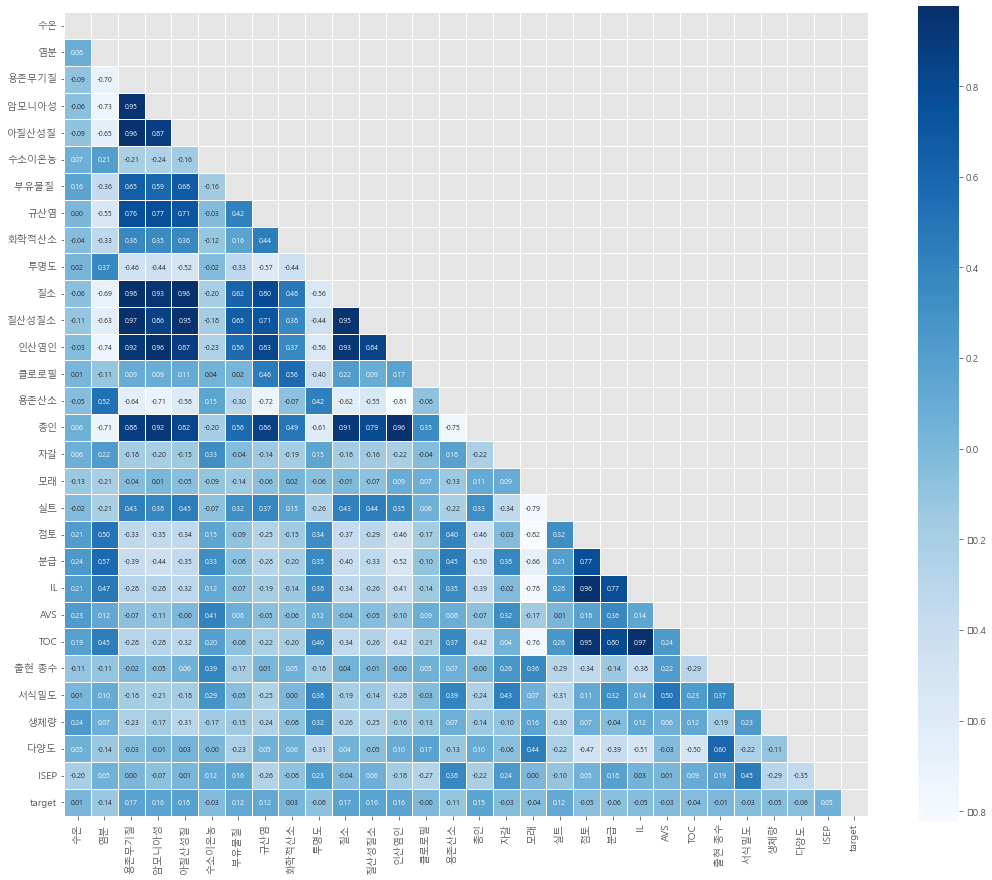

In [54]:
cor_data = raw_coast_data.drop(['id'], axis = 1).corr()

# Heatamp 옵션 생성
mask = np.zeros_like(cor_data, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Heatmap
plt.figure(figsize = (18, 15))

sns.heatmap(cor_data, mask = mask, square = True, linewidths = 0.5, cmap = 'Blues', fmt = '.2f', annot = True, annot_kws = {'fontsize' : 7})
plt.show()

- Target 값을 단순히 수치형으로 생각하고, 히트맵을 살펴보면 모든 변수와의 상관계수가 낮음을 확인할 수 있다.

- 독립변수간의 상관계수가 높은 값들이 관측되므로, 서로 상관계수가 높은 변수들을 처리해주어야 한다.

In [44]:
# 독립변수의 분포를 확인하고 종속변수와의 Boxplot을 시각화해주는 함수 생성
def stat_visual_analysis(indepen_value = None, depen_value = None, data = None):
    
    # 왜도, 첨도 구하기
    skew_value = np.round(stats.skew(data[indepen_value]), 4)
    kurt_value = np.round(stats.kurtosis(data[indepen_value]), 4)
    
    print('{} 변수의 왜도 :'.format(indepen_value), skew_value, '\n')
    print('{} 변수의 첨도 :'.format(indepen_value), kurt_value, '\n')
    
    # 해당 변수의 IQR 방법을 사용하여 이상치 확인하기
    Q1 = np.quantile(data[indepen_value], 0.25)
    Q3 = np.quantile(data[indepen_value], 0.75)
    
    # 1.5 가중치를 사용하여 계산
    IQR = Q3 - Q1
    IQR_weight = IQR * 1.5
    
    upper_value = Q3 + IQR_weight
    lower_value = Q1 - IQR_weight
    
    outlier_count = data[(data[indepen_value] < lower_value) | (data[indepen_value] > upper_value)].shape[0]
    print('{} 변수의 이상치 개수 :'.format(indepen_value), outlier_count, '\n')
    
    # 시각화 과정
    fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 5))
    
    # 독립변수의 Histogram 시각화
    sns.histplot(x = indepen_value, stat = 'density', data = data, ax = axes[0])
    sns.kdeplot(x = indepen_value, color = 'orange', linestyle = '--', linewidth = 5, data = data, ax = axes[0])
    
    # 독립변수의 Boxplot 시각화
    sns.boxplot(x = indepen_value, data = data, ax = axes[1])
    sns.swarmplot(x = indepen_value, alpha = 0.3, data = data, ax = axes[1])
    axes[1].axvline(upper_value, color = 'green', linewidth = 4, alpha = 0.5, linestyle = '--')
    axes[1].axvline(lower_value, color = 'green', linewidth = 4, alpha = 0.5, linestyle = '--')
    
    # 종속변수와의 Boxplot 시각화
    sns.boxplot(x = depen_value, y = indepen_value, data = data, ax = axes[2])
    sns.swarmplot(x = depen_value, y = indepen_value, alpha = 0.5, data = data, ax = axes[2])
    
    for index in [0, 1, 2]:
        axes[index].set_title('{}'.format(indepen_value), fontsize = 12)
        axes[index].set_xlabel('')
        axes[index].set_ylabel('')
    
    fig.tight_layout()

### 수온

수온 변수의 왜도 : -0.9856 

수온 변수의 첨도 : 1.7005 

수온 변수의 이상치 개수 : 93 



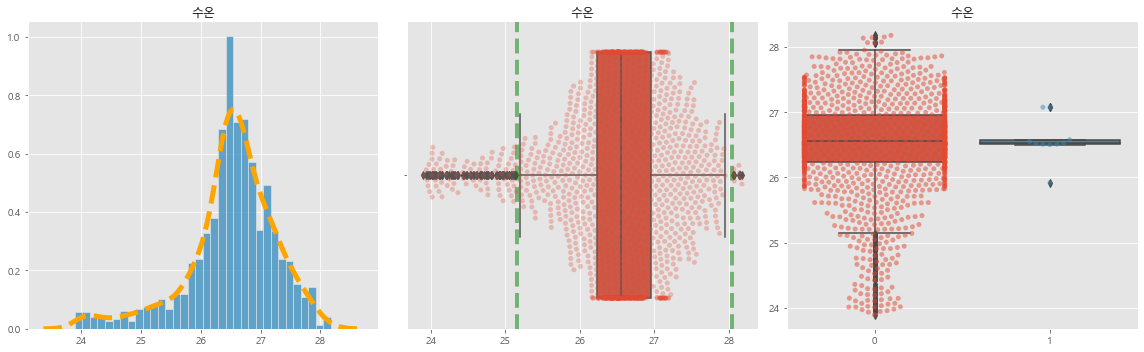

In [45]:
stat_visual_analysis(indepen_value = '수온', depen_value = 'target', data = raw_coast_data)

### 염분

염분 변수의 왜도 : -2.3453 

염분 변수의 첨도 : 8.0809 

염분 변수의 이상치 개수 : 62 



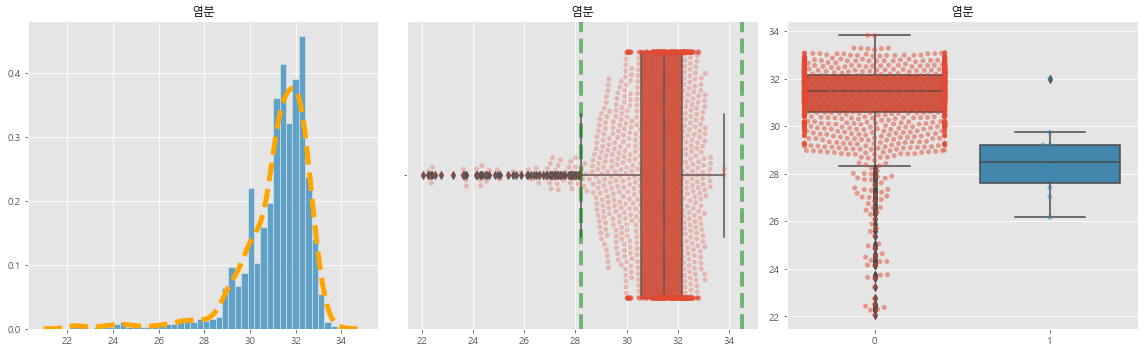

In [46]:
stat_visual_analysis(indepen_value = '염분', depen_value = 'target', data = raw_coast_data)

### 용존무기질

용존무기질 변수의 왜도 : 2.2217 

용존무기질 변수의 첨도 : 4.7115 

용존무기질 변수의 이상치 개수 : 258 



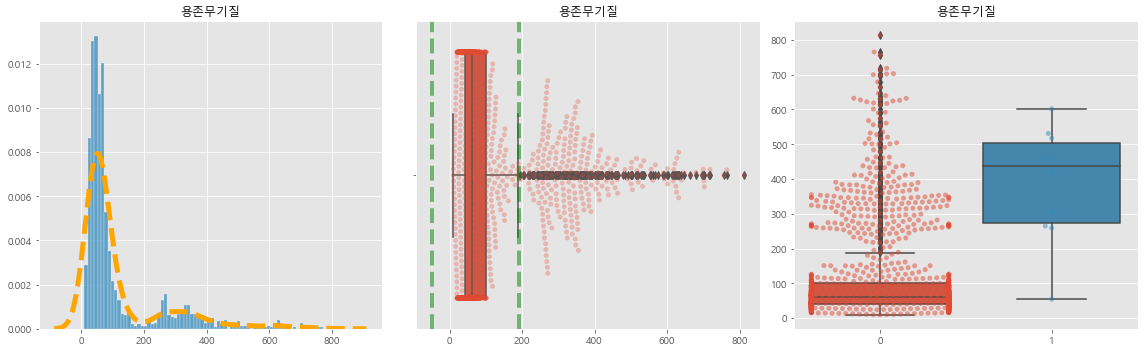

In [48]:
stat_visual_analysis(indepen_value = '용존무기질', depen_value = 'target', data = raw_coast_data)

In [47]:
raw_coast_data.head()

,id,수온,염분,용존무기질,암모니아성,아질산성질,수소이온농,부유물질,규산염,화학적산소,투명도,질소,질산성질소,인산염인,클로로필,용존산소,총인,자갈,모래,실트,점토,평균,분급,IL,AVS,TOC,출현 종수,서식밀도,생체량,다양도,ISEP,target
0,316,26.545904,32.266284,66.109781,14.322414,6.973147,8.971842,11.729158,304.898470,1.932255,2.790482,272.399140,44.816863,9.331492,4.020105,8.383000,27.493661,2.131936,21.012963,53.767258,23.087646,5.896506,2.241080,3.900139,0.012845,0.575763,13,1073,150.545300,1.715788,4.175382,0
1,317,26.555080,32.312201,64.474075,14.593281,6.735420,9.020974,11.715535,305.709195,1.920633,2.876308,269.995185,43.151896,9.239086,4.006589,8.381494,27.350137,2.388136,22.438908,52.496485,22.697930,5.805929,2.224635,3.867279,0.012892,0.568869,13,1100,146.906715,1.707911,4.207599,0
2,401,24.010903,31.337345,27.902231,12.518333,2.279968,8.153232,7.047915,158.576875,1.820178,2.495793,200.074455,13.180409,7.248091,5.254767,8.494714,21.724608,0.564265,55.127657,35.540126,8.770322,4.176170,1.634023,2.947883,0.006344,0.383511,13,1047,314.910615,1.745795,4.040487,0
3,402,24.195079,31.393658,42.311762,19.336271,3.228646,8.144855,7.970248,201.319945,1.867706,2.524248,217.344345,19.809824,9.458643,5.185926,8.302811,25.360672,0.541554,53.524824,36.376906,9.480037,4.281806,1.744004,3.112902,0.007427,0.408045,13,1051,338.006930,1.776740,3.981114,0
4,403,24.317078,31.425321,58.525447,27.159785,4.254249,8.137352,9.072605,253.782260,1.937710,2.545189,237.580635,27.159875,12.054842,5.129125,8.086393,29.792724,0.550979,53.523564,35.998440,9.931874,4.338587,1.816959,3.226403,0.008408,0.424802,14,1072,365.213195,1.810976,3.902928,0


## Modeling

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
print('Before OverSampling, the shape of X :', raw_coast_data.drop('target', axis = 1).shape, '\n')
print('Before OverSampling, the shape of y :', raw_coast_data['target'].shape, '\n')

# SMOTE 모델 객체 생성
smote = SMOTE(random_state = 100)

X_resample, y_resample = smote.fit_sample(raw_coast_data.drop('target', axis = 1), raw_coast_data['target'])
print('After OverSampling, the shape of X :', X_resample.shape, '\n')
print('After OverSampling, the shape of y :', y_resample.shape, '\n')

# Over Sampling 데이터 합치기
model_data = pd.concat([X_resample, y_resample], axis = 1)
display(model_data.head())

Before OverSampling, the shape of X : (1399, 30) 

Before OverSampling, the shape of y : (1399,) 

After OverSampling, the shape of X : (2778, 30) 

After OverSampling, the shape of y : (2778,) 



,id,수온,염분,용존무기질,암모니아성,아질산성질,수소이온농,부유물질,규산염,화학적산소,투명도,질소,질산성질소,인산염인,클로로필,용존산소,총인,자갈,모래,실트,점토,분급,IL,AVS,TOC,출현 종수,서식밀도,생체량,다양도,ISEP,target
0,316,26.545904,32.266284,66.109781,14.322414,6.973147,8.971842,11.729158,304.898470,1.932255,2.790482,272.399140,44.816863,9.331492,4.020105,8.383000,27.493661,2.131936,21.012963,53.767258,23.087646,2.241080,3.900139,0.012845,0.575763,13,1073,150.545300,1.715788,4.175382,0
1,317,26.555080,32.312201,64.474075,14.593281,6.735420,9.020974,11.715535,305.709195,1.920633,2.876308,269.995185,43.151896,9.239086,4.006589,8.381494,27.350137,2.388136,22.438908,52.496485,22.697930,2.224635,3.867279,0.012892,0.568869,13,1100,146.906715,1.707911,4.207599,0
2,401,24.010903,31.337345,27.902231,12.518333,2.279968,8.153232,7.047915,158.576875,1.820178,2.495793,200.074455,13.180409,7.248091,5.254767,8.494714,21.724608,0.564265,55.127657,35.540126,8.770322,1.634023,2.947883,0.006344,0.383511,13,1047,314.910615,1.745795,4.040487,0
3,402,24.195079,31.393658,42.311762,19.336271,3.228646,8.144855,7.970248,201.319945,1.867706,2.524248,217.344345,19.809824,9.458643,5.185926,8.302811,25.360672,0.541554,53.524824,36.376906,9.480037,1.744004,3.112902,0.007427,0.408045,13,1051,338.006930,1.776740,3.981114,0
4,403,24.317078,31.425321,58.525447,27.159785,4.254249,8.137352,9.072605,253.782260,1.937710,2.545189,237.580635,27.159875,12.054842,5.129125,8.086393,29.792724,0.550979,53.523564,35.998440,9.931874,1.816959,3.226403,0.008408,0.424802,14,1072,365.213195,1.810976,3.902928,0


In [59]:
from pycaret.classification import *

In [60]:
setup = setup(model_data.drop('id', axis = 1), target = 'target')

,Description,Value
0,session_id,1621
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(2778, 30)"
5,Missing Values,False
6,Numeric Features,28
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [61]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9964,0.9991,0.9990,0.9940,0.9965,0.9928,0.9928,0.0640
et,Extra Trees Classifier,0.9954,0.9999,0.9990,0.9920,0.9955,0.9907,0.9908,0.0400
lightgbm,Light Gradient Boosting Machine,0.9954,0.9987,0.9990,0.9920,0.9955,0.9907,0.9908,0.0670
dt,Decision Tree Classifier,0.9923,0.9922,0.9960,0.9891,0.9925,0.9846,0.9847,0.0070
ada,Ada Boost Classifier,0.9923,0.9978,0.9970,0.9881,0.9925,0.9846,0.9846,0.0440
gbc,Gradient Boosting Classifier,0.9918,0.9972,0.9970,0.9872,0.9920,0.9835,0.9837,0.1480
knn,K Neighbors Classifier,0.9717,0.9912,0.9990,0.9489,0.9731,0.9433,0.9450,0.2300
lda,Linear Discriminant Analysis,0.9542,0.9777,0.9919,0.9243,0.9568,0.9082,0.9111,0.0060
lr,Logistic Regression,0.9465,0.9752,0.9697,0.9288,0.9487,0.8929,0.8941,0.5160
ridge,Ridge Classifier,0.9414,0.0000,0.9798,0.9125,0.9447,0.8825,0.8857,0.0040


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1621, verbose=0,
                       warm_start=False)